In [1]:
import timm
import torch
import torch.nn as nn
import copy
from torch.utils.data import DataLoader, random_split
from sklearn.metrics import confusion_matrix
from torchvision import transforms, datasets

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
class CNN_5Layer(nn.Module):
    def __init__(self):
        super(CNN_5Layer, self).__init__()

        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.5),

            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.5),

            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.5),

            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.5),
        )

        dummy_input = torch.randn(1, 3, 224, 224)
        conv_output_size = self._get_conv_output_size(dummy_input)

        self.fc_layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(conv_output_size, 4, bias=True),
            nn.Softmax(dim=1)
        )

        self.l1_regularizer = nn.L1Loss()

    def _get_conv_output_size(self, x):
        with torch.no_grad():
            conv_output = self.conv_layers(x)
        return conv_output.view(x.size(0), -1).shape[1]

    def forward(self, x):
        x = self.conv_layers(x)
        x = self.fc_layers(x)
        return x

In [3]:
class CNN_6Layer(nn.Module):
    def __init__(self):
        super(CNN_6Layer, self).__init__()

        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.5),

            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.5),

            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.5),

            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.5),

            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.5),
        )

        dummy_input = torch.randn(1, 3, 224, 224)
        conv_output_size = self._get_conv_output_size(dummy_input)

        self.fc_layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(conv_output_size, 4, bias=True),
            nn.Softmax(dim=1)
        )

        self.l1_regularizer = nn.L1Loss()

    def _get_conv_output_size(self, x):
        with torch.no_grad():
            conv_output = self.conv_layers(x)
        return conv_output.view(x.size(0), -1).shape[1]

    def forward(self, x):
        x = self.conv_layers(x)
        x = self.fc_layers(x)
        return x

In [4]:
def create_cnn(model_name):
    if model_name == '5-layer': model = CNN_5Layer()
    if model_name == '6-layer': model = CNN_6Layer()

    return model

In [15]:
transform = transforms.Compose([transforms.Resize((224, 224)), transforms.ToTensor(), transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])])

dataset = datasets.ImageFolder(root='/home/ubuntu/Parkinson-Project/non-keyframes/energy_images', transform=transform)

total_size = len(dataset)
train_size = int(total_size * 0.8) 
validation_size = int(total_size * 0.1) 
test_size = total_size - train_size - validation_size
generator = torch.Generator().manual_seed(0) 
train_dataset, validation_dataset, test_dataset = random_split(dataset, [train_size, validation_size, test_size], generator=generator)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(validation_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [16]:
experiment = 'cnn-6-layer-130-epochs-early-stopping-with-regularization'

In [17]:
model_type = '6-layer'
model = create_cnn(model_type)

# Model summary to check architecture
print(model)

CNN_6Layer(
  (conv_layers): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Dropout(p=0.5, inplace=False)
    (5): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Dropout(p=0.5, inplace=False)
    (10): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Dropout(p=0.5, inplace=False)
    (15): Conv2d(64, 64, kernel_size=(3, 3), s

In [18]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.00005)

In [19]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")
model.to(device)

num_epochs = 130  
patience = 20  
best_val_loss = float('inf')  
best_model = None  

train_loss_list = list()
val_loss_list = list()
train_accuracy_list = list()
val_accuracy_list = list()

for epoch in range(num_epochs):
    model.train() 
    running_loss = 0.0
    correct = 0
    total = 0
    print(f"Epoch {epoch+1}")

    for batch_idx, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)  

        optimizer.zero_grad()  
        outputs = model(images)  
        loss = criterion(outputs, labels)  
        loss.backward() 
        optimizer.step() 

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        print(f"Batch {batch_idx+1}, Loss: {loss.item():.6f}, Accuracy: {100 * correct / total:.2f}%")

    train_loss = running_loss / len(train_loader)
    train_accuracy = 100 * correct / total
    print(f"Training - Epoch {epoch+1}, Loss: {train_loss:.6f}, Accuracy: {train_accuracy:.2f}%")

    train_loss_list.append(train_loss)
    train_accuracy_list.append(train_accuracy)

    # Validation step
    model.eval()  
    val_loss = 0.0
    val_correct = 0
    val_total = 0

    with torch.no_grad():  
        for batch_idx, (images, labels) in enumerate(val_loader):
            images, labels = images.to(device), labels.to(device)  

            outputs = model(images) 
            loss = criterion(outputs, labels) 

            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

            print(f"Validation Batch {batch_idx+1}, Loss: {loss.item():.6f}, Accuracy: {100 * val_correct / val_total:.2f}%")

    val_loss /= len(val_loader)
    val_accuracy = 100 * val_correct / val_total
    print(f"Validation - Epoch {epoch+1}, Loss: {val_loss:.6f}, Accuracy: {val_accuracy:.2f}%")

    val_loss_list.append(val_loss)
    val_accuracy_list.append(val_accuracy)

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_model = copy.deepcopy(model)
        patience_counter = 0
    else:
        patience_counter += 1

    print(f'Patience—{patience_counter}')

    # Check for early stopping
    if patience_counter >= patience:
        print(f"Early stopping at epoch {epoch+1}")
        break

model = best_model
torch.save(model.state_dict(), f'{experiment}-{model_type}')

Using device: cuda:0
Epoch 1


Batch 1, Loss: 1.407307, Accuracy: 25.00%
Batch 2, Loss: 1.395795, Accuracy: 23.44%
Batch 3, Loss: 1.424106, Accuracy: 23.44%
Batch 4, Loss: 1.349818, Accuracy: 25.00%
Batch 5, Loss: 1.370748, Accuracy: 26.56%
Batch 6, Loss: 1.410257, Accuracy: 26.82%
Batch 7, Loss: 1.367382, Accuracy: 27.23%
Batch 8, Loss: 1.318323, Accuracy: 28.32%
Batch 9, Loss: 1.400960, Accuracy: 28.65%
Batch 10, Loss: 1.334257, Accuracy: 29.69%
Batch 11, Loss: 1.357157, Accuracy: 30.40%
Batch 12, Loss: 1.372787, Accuracy: 30.47%
Batch 13, Loss: 1.368748, Accuracy: 30.89%
Batch 14, Loss: 1.323061, Accuracy: 31.25%
Batch 15, Loss: 1.349883, Accuracy: 31.46%
Batch 16, Loss: 1.348542, Accuracy: 32.03%
Batch 17, Loss: 1.339627, Accuracy: 31.99%
Batch 18, Loss: 1.319380, Accuracy: 32.47%
Batch 19, Loss: 1.356905, Accuracy: 32.81%
Batch 20, Loss: 1.301410, Accuracy: 33.44%
Batch 21, Loss: 1.310957, Accuracy: 34.00%
Batch 22, Loss: 1.338154, Accuracy: 34.16%
Batch 23, Loss: 1.383393, Accuracy: 33.90%
Batch 24, Loss: 1.36

In [ ]:
torch.save(model.state_dict(), f'{experiment}-{model_type}')

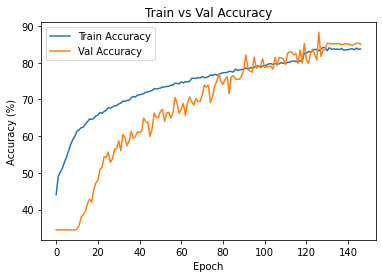

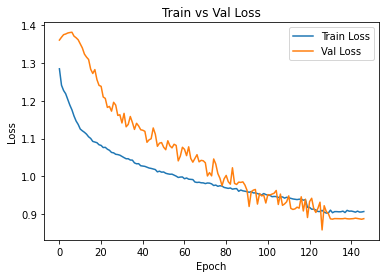

In [26]:
import matplotlib.pyplot as plt

plt.plot(train_accuracy_list, label='Train Accuracy')

# Plotting the second graph
plt.plot(val_accuracy_list, label='Val Accuracy')

# Adding labels and a legend
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Train vs Val Accuracy')
plt.legend()

# Display the plot
plt.show()

plt.plot(train_loss_list, label='Train Loss')

# Plotting the second graph
plt.plot(val_loss_list, label='Val Loss')

# Adding labels and a legend
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Val Loss')
plt.legend()

# Display the plot
plt.show()

In [21]:
model.eval()

test_loss = 0.0
test_correct = 0
test_total = 0
all_predictions = []
all_labels = []

with torch.no_grad():
    for batch_idx, (images, labels) in enumerate(test_loader):
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)

        loss = criterion(outputs, labels)
        test_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        test_total += labels.size(0)
        test_correct += (predicted == labels).sum().item()

        all_predictions.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

        print(f"Test Batch {batch_idx+1}, Loss: {loss.item():.6f}, Accuracy: {100 * test_correct / test_total:.2f}%")

test_loss /= len(test_loader)
test_accuracy = 100 * test_correct / test_total

print(f"Test Set - Loss: {test_loss:.6f}, Accuracy: {test_accuracy:.2f}%")

cm = confusion_matrix(all_labels, all_predictions)
print("Confusion Matrix:")
print(cm)

Test Batch 1, Loss: 0.863547, Accuracy: 85.94%
Test Batch 2, Loss: 0.833212, Accuracy: 88.28%
Test Batch 3, Loss: 0.852718, Accuracy: 88.54%
Test Batch 4, Loss: 0.882028, Accuracy: 87.89%
Test Batch 5, Loss: 0.807814, Accuracy: 89.38%
Test Batch 6, Loss: 0.923640, Accuracy: 88.28%
Test Batch 7, Loss: 0.871746, Accuracy: 87.95%
Test Batch 8, Loss: 0.910185, Accuracy: 87.50%
Test Batch 9, Loss: 0.832938, Accuracy: 88.02%
Test Batch 10, Loss: 0.832936, Accuracy: 88.44%
Test Batch 11, Loss: 0.896060, Accuracy: 88.21%
Test Batch 12, Loss: 0.854661, Accuracy: 88.41%
Test Batch 13, Loss: 0.847278, Accuracy: 88.46%
Test Batch 14, Loss: 0.873774, Accuracy: 88.28%
Test Batch 15, Loss: 0.925148, Accuracy: 87.81%
Test Batch 16, Loss: 0.866219, Accuracy: 87.79%
Test Batch 17, Loss: 0.856494, Accuracy: 87.87%
Test Batch 18, Loss: 0.904995, Accuracy: 87.59%
Test Batch 19, Loss: 0.907451, Accuracy: 87.34%
Test Batch 20, Loss: 0.858174, Accuracy: 87.42%
Test Batch 21, Loss: 0.843727, Accuracy: 87.57%
T

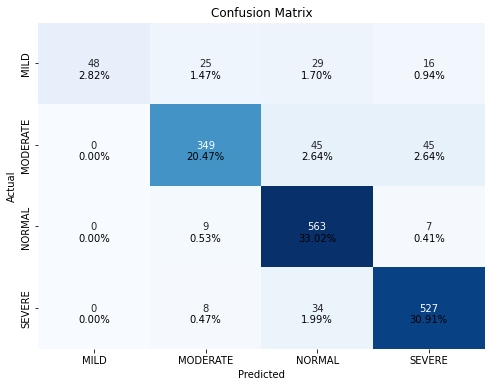

Accuracy: 0.87


In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score

cm = confusion_matrix(all_labels, all_predictions)

# Calculate accuracy
accuracy = accuracy_score(all_labels, all_predictions)

# Calculate percentages for each element
cm_percentage = (cm / np.sum(cm)) * 100

# Plot confusion matrix with count and percentages
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['MILD', 'MODERATE', 'NORMAL', 'SEVERE'],
            yticklabels=['MILD', 'MODERATE', 'NORMAL', 'SEVERE'],
            ax=ax)

# Annotate each box with count and percentage
for i in range(len(cm)):
    for j in range(len(cm[0])):
        ax.text(j + 0.5, i + 0.5, f'\n\n{cm_percentage[i, j]:.2f}%',
                ha='center', va='center', color='black')

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(f'Accuracy: {accuracy:.2f}')

In [23]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")
model.to(device)

num_epochs = 130  
patience = 20
patience_counter = 3   

for epoch in range(num_epochs):
    model.train() 
    running_loss = 0.0
    correct = 0
    total = 0
    print(f"Epoch {epoch+1}")

    for batch_idx, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)  

        optimizer.zero_grad()  
        outputs = model(images)  
        loss = criterion(outputs, labels)  
        loss.backward() 
        optimizer.step() 

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        print(f"Batch {batch_idx+1}, Loss: {loss.item():.6f}, Accuracy: {100 * correct / total:.2f}%")

    train_loss = running_loss / len(train_loader)
    train_accuracy = 100 * correct / total
    print(f"Training - Epoch {epoch+1}, Loss: {train_loss:.6f}, Accuracy: {train_accuracy:.2f}%")

    train_loss_list.append(train_loss)
    train_accuracy_list.append(train_accuracy)

    # Validation step
    model.eval()  
    val_loss = 0.0
    val_correct = 0
    val_total = 0

    with torch.no_grad():  
        for batch_idx, (images, labels) in enumerate(val_loader):
            images, labels = images.to(device), labels.to(device)  

            outputs = model(images) 
            loss = criterion(outputs, labels) 

            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

            print(f"Validation Batch {batch_idx+1}, Loss: {loss.item():.6f}, Accuracy: {100 * val_correct / val_total:.2f}%")

    val_loss /= len(val_loader)
    val_accuracy = 100 * val_correct / val_total
    print(f"Validation - Epoch {epoch+1}, Loss: {val_loss:.6f}, Accuracy: {val_accuracy:.2f}%")

    val_loss_list.append(val_loss)
    val_accuracy_list.append(val_accuracy)

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_model = copy.deepcopy(model)
        patience_counter = 0
    else:
        patience_counter += 1

    print(f'Patience—{patience_counter}')

    # Check for early stopping
    if patience_counter >= patience:
        print(f"Early stopping at epoch {epoch+1}")
        break

model = best_model
torch.save(model.state_dict(), f'{experiment}-{model_type}')

Using device: cuda:0
Epoch 1
Batch 1, Loss: 0.890514, Accuracy: 85.94%
Batch 2, Loss: 0.968432, Accuracy: 82.03%
Batch 3, Loss: 0.909088, Accuracy: 82.81%
Batch 4, Loss: 0.880478, Accuracy: 83.98%
Batch 5, Loss: 0.890358, Accuracy: 84.06%
Batch 6, Loss: 0.820727, Accuracy: 85.42%
Batch 7, Loss: 0.840786, Accuracy: 86.38%
Batch 8, Loss: 0.873823, Accuracy: 86.52%
Batch 9, Loss: 0.916289, Accuracy: 86.11%
Batch 10, Loss: 0.915615, Accuracy: 85.78%
Batch 11, Loss: 0.961150, Accuracy: 85.09%
Batch 12, Loss: 0.906034, Accuracy: 84.90%
Batch 13, Loss: 0.898553, Accuracy: 84.86%
Batch 14, Loss: 0.884389, Accuracy: 85.04%
Batch 15, Loss: 0.879476, Accuracy: 85.10%
Batch 16, Loss: 0.940196, Accuracy: 84.77%
Batch 17, Loss: 0.942966, Accuracy: 84.28%
Batch 18, Loss: 0.852851, Accuracy: 84.55%
Batch 19, Loss: 0.866116, Accuracy: 84.70%
Batch 20, Loss: 0.892155, Accuracy: 84.84%
Batch 21, Loss: 0.865259, Accuracy: 85.04%
Batch 22, Loss: 0.902459, Accuracy: 85.01%
Batch 23, Loss: 0.930854, Accuracy